# Global Southern Ocean Apex Surface Mooring (GS01SUMO) Data Quality Report
**Evaluation Date**: 5/22/2018

**Evaluator**: Justin Stopa

## Review Summary

Review Summary
This report summarizes an example data quality review of the Global Southern Ocean Apex Surface Mooring (GS01SUMO).  In addition to the wave data, I also use wind speeds from the METBK sensors which measure wind speeds. My goal is to understand the data quality from recovered datasets. My particular interest is to know how many large events (Hs>10 m) are captured and the quality of those events. The eventual goal is to use these data as reference for calibration of different satellite technologies such as altimeters and synthetic aperture radars.

This report follows the steps below

1) Data Availability 
  *  What data are available? Are they relevant to the study you wish to pursue?

2) Metadata 
  * What metadata are available? Are they complete? Is anything missing? What does it tell you about the dataset (for good or bad)?

3) Understand the context
  * Plot a large range of data. Does it look right based on what you would expect? What are the ranges, and do they make sense?

4) Focus on one or more smaller ranges
  * Plot some smaller periods (in space or time) to see if they look correct or have issues.

5) Environmental Comparisons 
  * Compare the dataset with other datasets (e.g. from the cruise/shipboard)

6) Summary and conclusion

Due to the report location, I use data from a wave hindcast as well as wave data from altimeters to cross-validate the buoy observations. This analysis is not included in this ipynb but images are included in the cooresponding document. This particular location is interesting due to its remote location and high occurrence of large sea states. We summarize a few notes and recommendations at the end.


## 1. Selected instruments included in this report
In this report, we will evaluate the surface wave buoy (specifically wave spectra) from the Global Southern Ocean Apex Surface Mooring (GS01SUMO), focusing on the summer of 2017. Additional instruments on the mooring are listed for reference and could be used for further evaluation.

We focus on the recovered data stream in this review because they might be more data available.  There are 2 deployments I will focus on (1 & 2).  This can be seen here:
http://ooi.visualocean.net/instruments/view/GS01SUMO-SBD12-05-WAVSSA000#deployments


Deployment |	Cruise |	Start Date | Stop Date |	Mooring Asset |	Node Asset |	Sensor Asset |	Latitude |	Longitude |	Deployment Depth |	Water Depth
  -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | --
 1 |	AT-26-29 |	02/18/2015 |	12/27/2015 |	CGMGS-01SUMO-00001 | 	|	CGINS-WAVSSA-05971 |	-54.4083 |	-89.3575 |	0 |	4611
2 | NBP-15-11 |	12/14/2015 |	12/12/2016 |	CGMGS-01SUMO-00002 |	|	CGINS-WAVSSA-04571 |	-54.4041 |	-89.2069 |	0 |	4588
3 |	NBP16-10 |	11/25/2016 |	|	CGMGS-01SUMO-00003 |	|	CGINS-WAVSSA-05971 |	-54.4076 |	-89.3567 |	0 |	4612


Additionally a graph of data availability is available here:
http://ooi.visualocean.net/instruments/view/GS01SUMO-SBD12-05-WAVSSA000



In [0]:
# Setup Instrument Variables
site = 'GS01SUMO'
node = 'SBD12'
instrument = '05-WAVSSA000'
method = 'recovered_host'
stream = 'wavss_a_dcl_statistics_recovered'
# Non-directional wave spectra
streamS = 'wavss_a_dcl_non_directional_recovered'
# Buoy displacement: x,y,z
# wavss_a_dcl_motion_recovered
# Wave (2D) frequency-direction wave spectra?  I am not completely sure... 
# wavss_a_dcl_mean_directional_recovered
# Fourier... no idea what this is...
# stream= 'wavss_a_dcl_fourier_recovered'

# Met sensors (wind speed)
instrumentA='06-METBKA000'
methodA = 'recovered_host'
# raw data wind u and v at anemometer height
# stream = 'metbk_a_dcl_instrument_recovered'
# flux measurements - has a U10 at neutral stability
streamA ='metbk_hourly'
# met_wind10m




## 1b. Time periods of interest
We will focus on the following time periods for evaluation:
* Deployment 1: 02/18/2015 to 02/27/2015
* Deployment 2: 12/14/2015 to 12/12/2016


## 2. Related Metadata
In this section, we will review some of metadata available in the system to make sure it is present and correct.

Before we get started, we need to set up our Python environment with some libraries, variables and functions we will need later in this report.

In [0]:
# Setup the Python processing environment 
import requests
import datetime
import pandas as pd


In [0]:
# API Information
USERNAME ='OOIAPI-WITS2KL3NKBNT4'
TOKEN= 'TEMP-TOKEN-N36TKZ9B0FA5M3'
DATA_API = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv'
VOCAB_API = 'https://ooinet.oceanobservatories.org/api/m2m/12586/vocab/inv'
ASSET_API = 'https://ooinet.oceanobservatories.org/api/m2m/12587'


In [0]:
# Specify some functions to convert timestamps
ntp_epoch = datetime.datetime(1900, 1, 1)
unix_epoch = datetime.datetime(1970, 1, 1)
ntp_delta = (unix_epoch - ntp_epoch).total_seconds()

def ntp_seconds_to_datetime(ntp_seconds):
    return datetime.datetime.utcfromtimestamp(ntp_seconds - ntp_delta).replace(microsecond=0)
  
def convert_time(ms):
  if ms != None:
    return datetime.datetime.utcfromtimestamp(ms/1000)
  else:
    return None


### 2a. Vocabulary Metadata
First, I grab some basic vocabulary information (metadata) from the system to make sure we have the right instrument.

In [5]:
# Setup the API request url
data_request_url ='/'.join((VOCAB_API,site,node,instrument))
print data_request_url
# Grab the information from the server
r = requests.get(data_request_url, auth=(USERNAME, TOKEN))
data = r.json()
print data

# Do same for met data
data_request_urlA ='/'.join((VOCAB_API,site,node,instrumentA))
print data_request_urlA
rA = requests.get(data_request_urlA, auth=(USERNAME, TOKEN))
dataA = rA.json()
print dataA

https://ooinet.oceanobservatories.org/api/m2m/12586/vocab/inv/GS01SUMO/SBD12/05-WAVSSA000
[{u'mindepth': 0.0, u'instrument': u'Surface Wave Spectra', u'tocL3': u'Surface Buoy', u'vocabId': 1237, u'tocL1': u'Global Southern Ocean', u'maxdepth': 0.0, u'tocL2': u'Apex Surface Mooring', u'model': u'TRIAXYS', u'refdes': u'GS01SUMO-SBD12-05-WAVSSA000', u'@class': u'.VocabRecord', u'manufacturer': u'Axys Technologies'}]
https://ooinet.oceanobservatories.org/api/m2m/12586/vocab/inv/GS01SUMO/SBD12/06-METBKA000
[{u'mindepth': -5.0, u'instrument': u'Bulk Meteorology Instrument Package', u'tocL3': u'Surface Buoy', u'vocabId': 1238, u'tocL1': u'Global Southern Ocean', u'maxdepth': -5.0, u'tocL2': u'Apex Surface Mooring', u'model': u'ASIMET', u'refdes': u'GS01SUMO-SBD12-06-METBKA000', u'@class': u'.VocabRecord', u'manufacturer': u'Star Engineering'}]


All this looks good!

### 2b. Deployment Information
Next, let's grab some information about the deployments for this instrument.  We will grab all of the recovered deployments available in the system and then output the date ranges, latitude/longitude, asset ID, and sensor ID for each.  Note that the **reference designator** specified above represents the geographical location of an instrument across all deployments (e.g. the wave buoy on the Global Southern Ocean site), the **Sensor ID** (and its Asset ID equivalent) represent the specific instrument used for a given deployment (i.e. a unique make, model, and serial numbered instrument).

In [6]:
# Setup the API request url
data_request_url = ASSET_API + '/events/deployment/query'
params = {
  'beginDT':'2015-02-18T00:00:00.000Z',
  'endDT':'2016-12-12T00:00:00.000Z',
  'refdes':site+'-'+node+'-'+instrument,   
}

# Grab the information from the server
r = requests.get(data_request_url, params=params, auth=(USERNAME, TOKEN))
data = r.json()

df = pd.DataFrame() # Setup empty array
for d in data:
  df = df.append({
      'deployment': d['deploymentNumber'],
      'start': convert_time(d['eventStartTime']),
      'stop': convert_time(d['eventStopTime']),
      'latitude': d['location']['latitude'],
      'longitude': d['location']['longitude'],
      'sensor': d['sensor']['uid'],
      'asset_id': d['sensor']['assetId'],
    }, ignore_index=True)
print df

   asset_id  deployment  latitude  longitude              sensor  \
0    1952.0         1.0 -54.40833 -89.357500  CGINS-WAVSSA-05971   
1    1266.0         2.0 -54.40408 -89.206910  CGINS-WAVSSA-04571   
2    1952.0         3.0 -54.40760 -89.356733  CGINS-WAVSSA-05971   

                start                 stop  
0 2015-02-18 21:06:00  2015-12-27 11:20:00  
1 2015-12-14 20:20:00  2016-12-12 07:58:00  
2 2016-11-25 01:11:00                 None  


### 2c. Annotations
Let's pull any relevant annotations for the instrument.

In [7]:
# block for wave statistics
ANNO_API = 'https://ooinet.oceanobservatories.org/api/m2m/12580/anno/find'
params = {
  'beginDT':int(datetime.date(2015,12,1).strftime('%s'))*1000,
  'endDT':int(datetime.date(2017,1,1).strftime('%s'))*1000,
  'refdes':site+'-'+node+'-'+instrument,
}
r = requests.get(ANNO_API, params=params, auth=(USERNAME, TOKEN))
data = r.json()
df = pd.DataFrame() # Setup empty array
for d in data:
  df = df.append({
    'annotation': d['annotation'],
    'start': convert_time(d['beginDT']),
    'stop': convert_time(d['endDT']),
    'site': d['subsite'],
    'node': d['node'],
    'sensor': d['sensor'],
    'id': d['id']
  }, ignore_index=True)
pd.set_option('display.max_colwidth', -1) # Show the full annotation text
print df

# Block for Met data
ANNO_API = 'https://ooinet.oceanobservatories.org/api/m2m/12580/anno/find'
params = {
  'beginDT':int(datetime.date(2015,12,1).strftime('%s'))*1000,
  'endDT':int(datetime.date(2017,1,1).strftime('%s'))*1000,
  'refdes':site+'-'+node+'-'+instrumentA,
}
r = requests.get(ANNO_API, params=params, auth=(USERNAME, TOKEN))
data = r.json()
dfA = pd.DataFrame() # Setup empty array
for d in data:
  dfA = dfA.append({
    'annotation': d['annotation'],
    'start': convert_time(d['beginDT']),
    'stop': convert_time(d['endDT']),
    'site': d['subsite'],
    'node': d['node'],
    'sensor': d['sensor'],
    'id': d['id']
  }, ignore_index=True)
pd.set_option('display.max_colwidth', -1) # Show the full annotation text
print dfA

                                                                                                                                                                           annotation  \
0  Upon recovery of deployment 2, damage to some components of the surface buoy were noted (e.g., FDCHP was bent, the tops of the METBK-PRC and FleetBroadBand antenna were missing).   

     id   node sensor      site      start       stop  
0  95.0  SBD12  None   GS01SUMO 2015-12-14 2016-12-12  
                                                                                                                                                                                                                                                                                                                                                                                                                                                                              annotation  \
0  Upon recovery of deployment 2, damage 

->For wave spectra: there is an annotations currently in the system, and it's for deployment 2: surface buoy was bent and the METBK-PRC sensor antenna was missing.

-> For wind speeds there are 2 annotations currently in the system: 
deployment 2 wind speeds are biased low (5%) compared to ship measurements
deployment 3:  At deployment (and continuing for several months), the sea surface temperature sensor exhibited random spikes. In the beginning of the deployment, the conductivity and salinity measured by the two met sensors were offset by ~0.01 S m-1 and ~0.1 psu, respectively (SBD12 was lower). The offset decreased over time, and gradually switched to SBD12 values being slightly higher (around Nov 2017). There was also a LWR (longwave radiation) offset of ~5 W m-2.   


## 3. Understand the context - the full dataset
Now let's take a look at a large range of data; roughly 2 years of data (Feb 2015-Dec 2015).  
Adding some  libraries to the Python environment.

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl

!pip install netCDF4
import netCDF4 as nc

!pip install xarray
import xarray as xr

!pip install cmocean
import cmocean

!pip install dask
import dask


import math


    100% |████████████████████████████████| 3.6MB 8.3MB/s 
    100% |████████████████████████████████| 3.3MB 9.3MB/s 
  Running setup.py bdist_wheel for cftime ... - \ | / done
  Stored in directory: /content/.cache/pip/wheels/10/32/0a/47d6323be1b72a6f4852f861f03ba69e826ba51aa6cfd2430b
Successfully built cftime
    100% |████████████████████████████████| 440kB 13.6MB/s 
    100% |████████████████████████████████| 266kB 6.8MB/s 
  Running setup.py bdist_wheel for cmocean ... - done
  Stored in directory: /content/.cache/pip/wheels/1e/9d/9e/0b3808afd7df52d465eca09f9175c185cfc0bb9fa43192e621
Successfully built cmocean


/usr/local/lib/python2.7/dist-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


    100% |████████████████████████████████| 2.3MB 7.9MB/s 
  Running setup.py bdist_wheel for dask ... - \ | done
  Stored in directory: /content/.cache/pip/wheels/8d/5d/b0/de56f34b25bc30bc140d5125429b73222ffb25c8260e8b141d
Successfully built dask


For simplicity, I first request data from the "Data Portal" to make a download request for all available data.  After receiving the email, I looked through the results and I am finding all files (netcdf) associated with the deployment.  Using these data files, I will create a few different plots to better understand the available data.

In [9]:
import re
import xarray as xr
import pandas as pd
import os
import numpy as np

url='https://opendap.oceanobservatories.org/thredds/catalog/ooi/justin-stopa-gmail/20180522T205739-GS01SUMO-SBD12-05-WAVSSA000-recovered_host-wavss_a_dcl_statistics_recovered/catalog.html'
tds_url = 'https://opendap.oceanobservatories.org/thredds/dodsC'
datasets = requests.get(url).text
urls = re.findall(r'href=[\'"]?([^\'" >]+)', datasets)
x = re.findall(r'(ooi/.*?.nc)', datasets)
for i in x:
    if i.endswith('.nc') == False:
        x.remove(i)
for i in x:
    try:
        float(i[-4])
    except:
        x.remove(i)
datasets = [os.path.join(tds_url, i) for i in x]
print datasets

dp = xr.open_mfdataset(datasets)
dp = dp.swap_dims({'obs': 'time'})
dp = dp.chunk({'time': 100})
dp = dp.sortby('time') # data from different deployments can overlap so we want to sort all data by time stamp.
print dp


[u'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/justin-stopa-gmail/20180522T205739-GS01SUMO-SBD12-05-WAVSSA000-recovered_host-wavss_a_dcl_statistics_recovered/deployment0002_GS01SUMO-SBD12-05-WAVSSA000-recovered_host-wavss_a_dcl_statistics_recovered_20151214T210737.792000-20161212T070740.217000.nc', u'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/justin-stopa-gmail/20180522T205739-GS01SUMO-SBD12-05-WAVSSA000-recovered_host-wavss_a_dcl_statistics_recovered/deployment0001_GS01SUMO-SBD12-05-WAVSSA000-recovered_host-wavss_a_dcl_statistics_recovered_20150218T212303.354000-20151227T102305.686000.nc']
<xarray.Dataset>
Dimensions:                              (time: 15017)
Coordinates:
    obs                                  (time) int64 0 1 2 3 4 5 6 7 8 9 10 ...
  * time                                 (time) datetime64[ns] 2015-02-18T21:23:03.353999872 ...
    lat                                  (time) float64 -54.41 -54.41 -54.41 ...
    lon                        

In [10]:
import re
import xarray as xr
import pandas as pd
import os

url='https://opendap.oceanobservatories.org/thredds/catalog/ooi/justin-stopa-gmail/20180523T194039-GS01SUMO-SBD12-05-WAVSSA000-recovered_host-wavss_a_dcl_non_directional_recovered/catalog.html'
tds_url = 'https://opendap.oceanobservatories.org/thredds/dodsC'
datasetsS = requests.get(url).text
urls = re.findall(r'href=[\'"]?([^\'" >]+)', datasetsS)
x = re.findall(r'(ooi/.*?.nc)', datasetsS)
for i in x:
    if i.endswith('.nc') == False:
        x.remove(i)
for i in x:
    try:
        float(i[-4])
    except:
        x.remove(i)
datasetsS = [os.path.join(tds_url, i) for i in x]


ds = xr.open_mfdataset(datasetsS)
ds = ds.swap_dims({'obs': 'time'})
ds = ds.chunk({'time': 100})
ds = ds.sortby('time') # data from different deployments can overlap so we want to sort all data by time stamp.
print ds


<xarray.Dataset>
Dimensions:                            (time: 15017, wavss_array: 123)
Coordinates:
    obs                                (time) int64 0 1 2 3 4 5 6 7 8 9 10 ...
  * time                               (time) datetime64[ns] 2015-02-18T21:23:04.701999616 ...
    lat                                (time) float64 -54.41 -54.41 -54.41 ...
    lon                                (time) float64 -89.36 -89.36 -89.36 ...
Dimensions without coordinates: wavss_array
Data variables:
    deployment                         (time) int32 1 1 1 1 1 1 1 1 1 1 1 1 ...
    id                                 (time) |S64 '341026d9-9e45-4c34-a3c4-58362fa722f6' ...
    date_string                        (time) object 'empty' 'empty' 'empty' ...
    dcl_controller_timestamp           (time) object 'empty' 'empty' 'empty' ...
    driver_timestamp                   (time) datetime64[ns] 2017-10-26T10:11:07.112127488 ...
    frequency_spacing                  (time) float32 0.005 0.005 0.005 ...


In [11]:

# Block for met data
url='https://opendap.oceanobservatories.org/thredds/catalog/ooi/justin-stopa-gmail/20180523T192152-GS01SUMO-SBD11-06-METBKA000-recovered_host-metbk_hourly/catalog.html'
tds_url = 'https://opendap.oceanobservatories.org/thredds/dodsC'
datasetsA = requests.get(url).text
urls = re.findall(r'href=[\'"]?([^\'" >]+)', datasetsA)
x = re.findall(r'(ooi/.*?.nc)', datasetsA)
for i in x:
    if i.endswith('.nc') == False:
        x.remove(i)
for i in x:
    try:
        float(i[-4])
    except:
        x.remove(i)
datasetsA = [os.path.join(tds_url, i) for i in x]
datasetsA

# find how to properly index
# From Sage start at index 0 and stride by 3
#d=datasetsA[0::3]
b=[datasetsA[x] for x in [0,3]]


dA = xr.open_mfdataset(b)
dA = dA.swap_dims({'obs': 'time'})
dA = dA.chunk({'time': 100})
dA = dA.sortby('time') # data from different deployments can overlap so we want to sort all data by time stamp.
dA

<xarray.Dataset>
Dimensions:                  (time: 5115)
Coordinates:
    obs                      (time) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 ...
  * time                     (time) datetime64[ns] 2015-04-05T21:07:13.050000384 ...
    lat                      (time) float64 -54.41 -54.41 -54.41 -54.41 ...
    lon                      (time) float64 -89.36 -89.36 -89.36 -89.36 ...
Data variables:
    met_timeflx              (time) datetime64[ns] 2015-04-05T21:07:13.050000384 ...
    deployment               (time) int32 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
    met_rainrte              (time) float64 0.0 0.0 0.0 0.0 0.0 0.09818 0.0 ...
    met_buoyfls              (time) float64 nan -0.006286 nan nan nan nan ...
    met_buoyflx              (time) float64 nan -0.00592 nan nan nan nan nan ...
    met_frshflx              (time) float64 nan 4.676e-05 nan nan nan nan ...
    met_heatflx              (time) float64 nan -0.8528 nan nan nan nan nan ...
    met_latnflx              (ti

Let's create a quick timeseries plot of significant wave height.  

Text(0.5,1,u'U10N (m/s)')

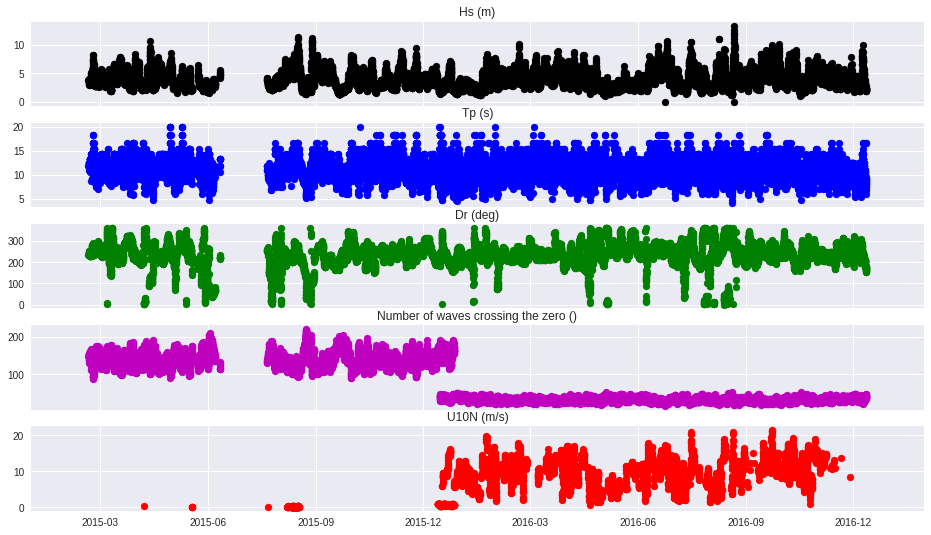

In [12]:

# Original plot
#ds['significant_wave_height'].plot()

# Modifed plot
# fig, ax = plt.subplots(figsize=(16,6))
# sty='default'
# mpl.style.use(sty)
# ax.set_title('Wave Conditions SO Surface BUOY', color='C0')
# ax.plot(dp['time'],dp['significant_wave_height'], 'C1', label='Hs (m)')
# ax.plot(dp['time'],dp['peak_wave_period'], 'C2', label='Tp (s)')
# ax.legend()

plt.close()
fig, axes = plt.subplots(5, sharex=True)
fig.set_size_inches(16,9)

p0 = axes[0].scatter(dp['time'].data,dp['significant_wave_height'].data,label='Hs (m)',color='k')
axes[0].set_title('Hs (m)')

p1 = axes[1].scatter(dp['time'].data,dp['peak_wave_period'].data,label='Tp (s)',color='b')
axes[1].set_title('Tp (s)')

p2 = axes[2].scatter(dp['time'].data,dp['mean_direction'].data,label='Dr (deg)',color='g')
axes[2].set_title('Dr (deg)')

p3 = axes[3].scatter(dp['time'].data,dp['number_zero_crossings'].data,label='N ()',color='m')
axes[3].set_title('Number of waves crossing the zero ()')

p4 = axes[4].scatter(dA['time'].data,dA['met_wind10m'].data,label='U10N (m/s)',color='r')
axes[4].set_title('U10N (m/s)')

At a first glance the data seems reasonable and consistent with the wave climate of the region. The sea state is very active with average seas above Hs>4 m. The wave heights are large due to the fact that there is a large and presumably infinite fetch available to generate waves (i.e. the large and unimpeded expanse of ocean available in the Southern Ocean).

There is one stretch of missing data and only a few points that drop below the lower limit of Hs>2.5 m. 

Additional the peak period and average direction (dominantly from the WSW) seem reasonable.

The U10N has a lot of missing data for this 1-year period.  Several values are less than 2 m/s which seem odd for this location and are mostly incorrect. 

Notice that the number of waves crossing zero changes between deployment 1 and deployment 2.  This is concerning because it suggests that the time the buoy measurements were taken changes.  The wave statistics computed using different averaging times could indeed be different. This was also seen in the wave spectra (see cooresponding pdf).


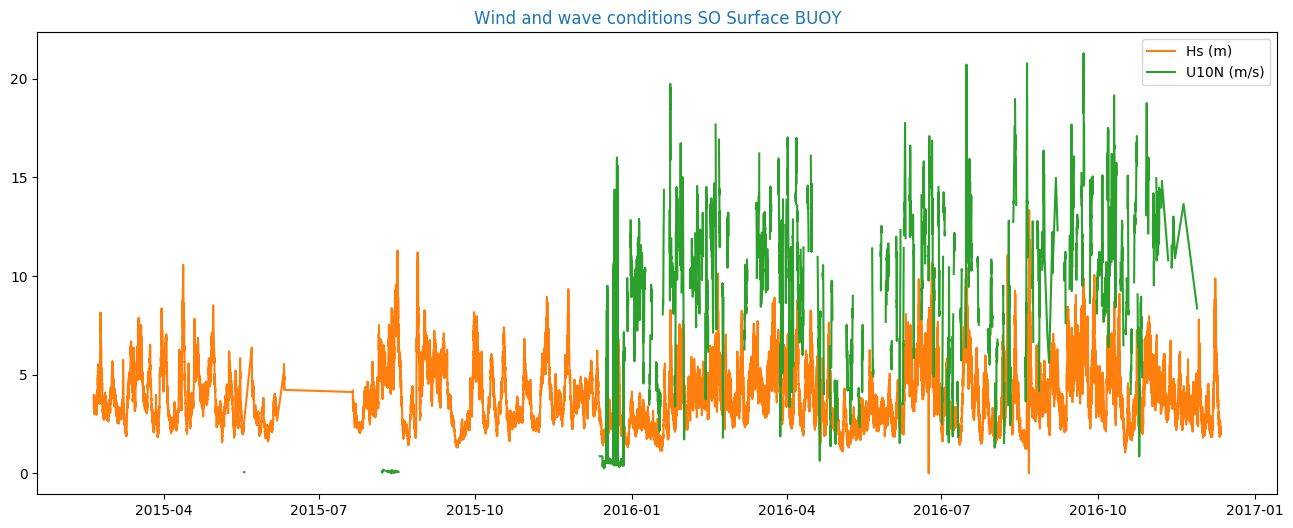

In [15]:
#dp['significant_wave_height'].plot();

# Now wind speed and Hs 
fig, ax = plt.subplots(figsize=(16,6))
sty='default'
mpl.style.use(sty)
ax.set_title('Wind and wave conditions SO Surface BUOY', color='C0')
ax.plot(dp['time'],dp['significant_wave_height'], 'C1', label='Hs (m)')
ax.plot(dA['time'],dA['met_wind10m'], 'C2', label='U10N (m/s)')
ax.legend()

To deepen the context. I included a plot from Stopa et al., 2013 OCEMOD showing the average wave height (Hs) and average wave direction from a wave hindcast using 30 years of data (1980-2009). This shows on average our location (lon=-89.20691W, lat=-54.40408) or approximately (270E,55S) typically has wave heights of at least 5 m throughout the year. Also notice that wave direction of WSW is consistent with the average wave direction plotted above. 


![Wave Climate- Seasonality from a wave hindcast (1980-2009)](https://drive.google.com/file/d/1Hlez7uILhujMvi_vbg176W_8fdb2RD12/view)



Here are some histograms to understand the range of data.  The histogram of Hs should follow a Rayleigh distribution. It should be relatively easy to pick out the suspected 'bad' values less than Hs of 2 m seen in the time series plots. It seems there are only 2 'bad' values (will confirm later).

I made a similar plot the the wind speed (U10N) this should follow a Weibull distribution.  This should also be relatively easy to pick out outliers or wrong data values.  The annotation file states that the wind speeds were biased low by 5% for deployment 2 shown here.

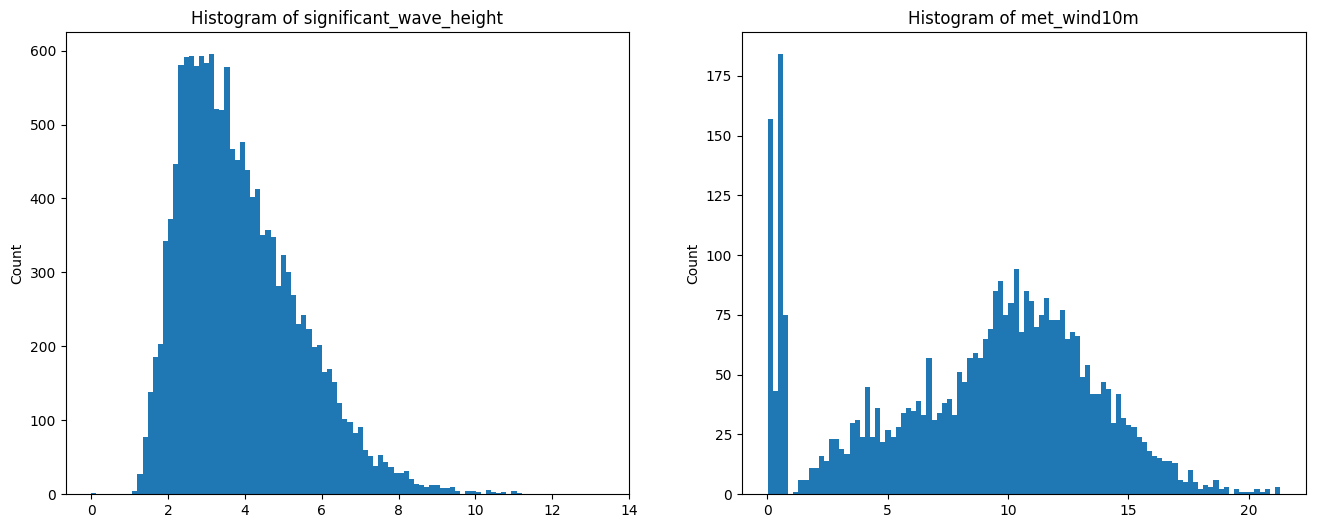

In [16]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
dp['significant_wave_height'].plot.hist(bins=100, ax=ax1)
dA['met_wind10m'].plot.hist(bins=100, ax=ax2);


There are some obvious outliers in both datasets.  There only seems to be few bad points for Hs and several for U10N. I am concerned about the underestimation of the wind speeds as noted in the annotation.  I will try and confirm this with independent data from models and possibly satellite observations. 

## 4. A closer look
Now we look at the day of maximum wave height (maximum of Hs).  In addition we look at December 2015 when the transition between deployment 1 and deployment 2 occured. 


In [17]:
# Find the time of the maximum Hs
xid=dp.where(dp['significant_wave_height']==dp['significant_wave_height'].max(),drop=True)
xid['time'].values





array(['2016-08-21T14:07:40.373000192'], dtype='datetime64[ns]')

(736197.0, 736198.0)

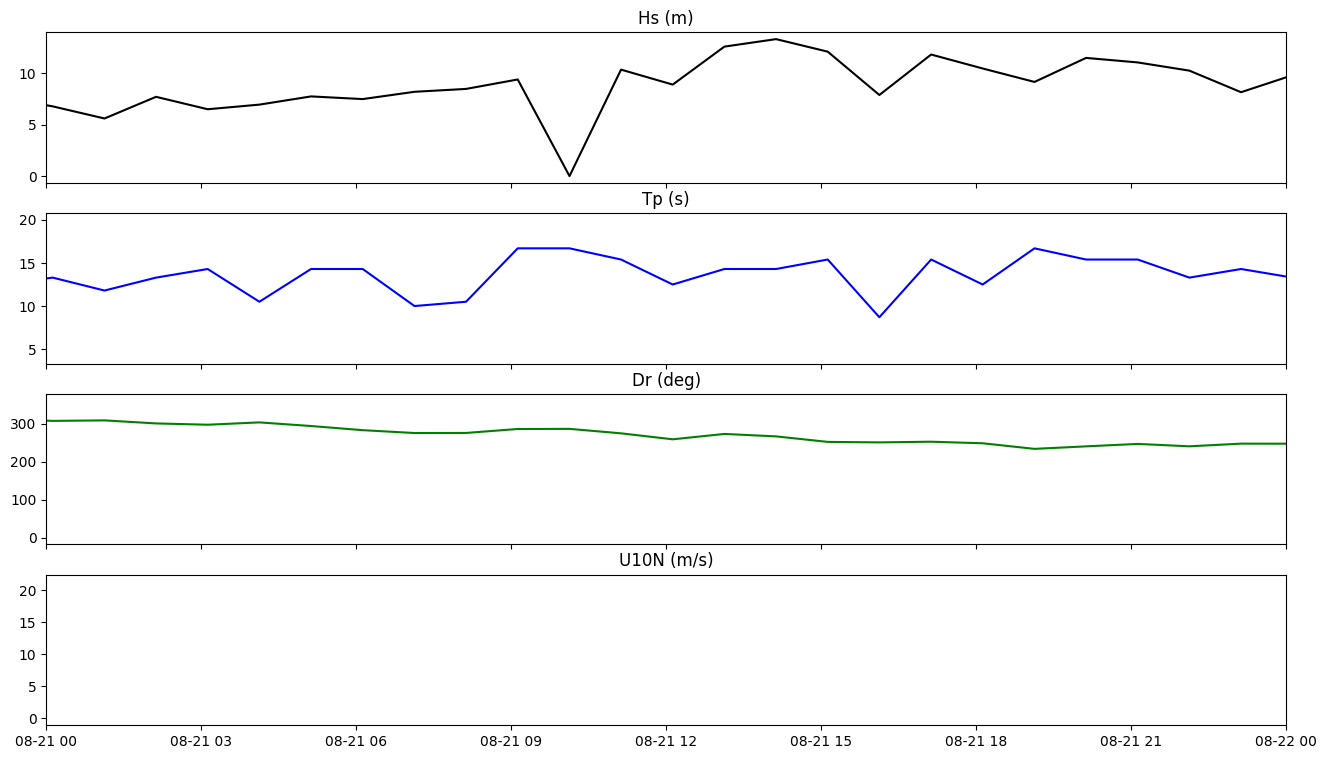

In [19]:
# Look at data near the maximum wave height
# it seems the Hs==0 is the incorrect
plt.close()
fig, axes = plt.subplots(4, sharex=True)
fig.set_size_inches(16,9)

p0 = axes[0].plot(dp['time'].data,dp['significant_wave_height'].data,label='Hs (m)',color='k')
axes[0].set_title('Hs (m)')

p1 = axes[1].plot(dp['time'].data,dp['peak_wave_period'].data,label='Tp (s)',color='b')
axes[1].set_title('Tp (s)')

p2 = axes[2].plot(dp['time'].data,dp['mean_direction'].data,label='Dr (deg)',color='g')
axes[2].set_title('Dr (deg)')

#p3 = axes[3].scatter(dA['time'].data,dA['met_wind10m'].data,label='U10N (m/s)',color='r')
axes[3].set_title('U10N (m/s)')

plt.xlim('2016-08-21T00:00:00','2016-08-22T00:00:00')



Data seems reasonable except when Hs is zero. This point will be removed.

(735945.0, 735961.0)

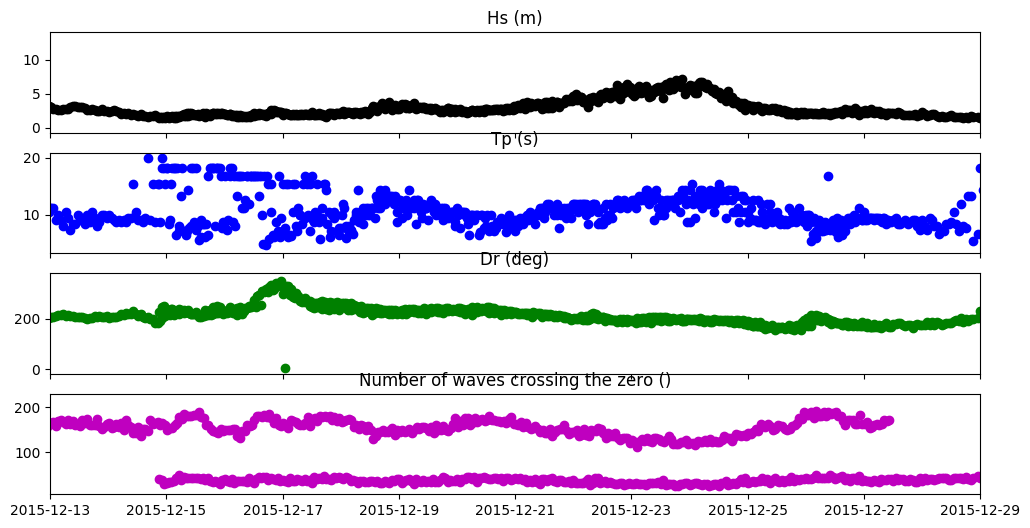

In [25]:
# Now explore December 2015 when the transition between deployment 1 and 2 occurred
plt.close()
fig, axes = plt.subplots(4, sharex=True)
fig.set_size_inches(12,6)

p0 = axes[0].scatter(dp['time'].data,dp['significant_wave_height'].data,label='Hs (m)',color='k')
axes[0].set_title('Hs (m)')

p1 = axes[1].scatter(dp['time'].data,dp['peak_wave_period'].data,label='Tp (s)',color='b')
axes[1].set_title('Tp (s)')

p2 = axes[2].scatter(dp['time'].data,dp['mean_direction'].data,label='Dr (deg)',color='g')
axes[2].set_title('Dr (deg)')

p3 = axes[3].scatter(dp['time'].data,dp['number_zero_crossings'].data,label='N ()',color='m')
axes[3].set_title('Number of waves crossing the zero ()')

plt.xlim('2015-12-13T00:00:00','2015-12-29T00:00:00')


Now the overlapping deployments are clear and the number of wave cross zero changes between deployment 1 and 2. There are no metadata available describing the time interval used to compute the wave statistics.  It is most likely that deployment 1 uses a longer averaging time window compared to deployment 2.

## 5. Comparison of data with external sources
We made three different attempts to compare wind speeds and wave parameters to external data sources.
 
 * The first analysis uses the wind anemometer from the ship to compare to U10N during the  cruise on the Nathaniel Palmer during December 2015.
 * Next we compare the wind speeds and wave parameters from altimeters to the sensors of the Global Southern Ocean array.
 * Finally we compare the wind speeds and wave parameters from a wave hindcast to the sensors of the Global Southern Ocean array.

Note it was difficult to perform the analysis in python.  See the supporting document for the Figures and a more detailed description. 


## 6. Summary and Outlook


**Summary**

Based on this analysis of the Global Southern Ocean surface wave buoy, we can summarize that the buoy measurements are of good quality. Here we summarize the findings:
* The underestimation of the U10 was confirmed comparing the ship during December 2015. Our analysis shows that the underestimation could be has high as 20%, but this was based only on 50 data points.
* The comparison between the altimeters shows: Hs, U10, and mean squared acceleration (mss) are all within a reasonable range of the buoy observations. However some larger discrepancies exist and Hs residuals of up 2 m are probable. At this stage it is not clear whether the buoy or altimeter or a combination of both contribute to these discrepancies. The residuals were largest under high sea states. The U10 from altimeter had a positive bias compared to the buoy consistent with the idea that the buoy might be underestimating U10.  The mss had the largest differences which could be reflective of buoy not being capable of capturing high frequency waves (due to its large size).
* The comparison between the model and buoy shows that the all buoy sea state parameters are within an acceptable range. In other words there were no obvious outliers. The U10 CFSR bias using the buoy as reference was only 0.4 m/s which is consistent that the buoy is underestimating U10. 
* The time period the buoy recorded data and statistics were computed was not specified in any metadata. However it is likely the period was longer for deployment 1 compared to deployment 2. This was clearly demonstrated by jump in the number of waves crossing zero.
* It is not clear how the damage to the buoy and antenna denoted in the annotation affect the quality of the observations.

**Outlook**

One of the purposes was to use this site to compare satellite observations. It seems the buoy data are of good quality and no strong biases were seen with respect to altimeters or models. So it is likely this data could be used to more rigorously develop techniques to improve satellite estimation at high sea states.

When the sea state is particular large the buoy can be tilted and a bias (presumably underestimation) of the Hs can occur. This was first demonstrated when Hurricane Katrina traveled directly over a buoy from the NDBC network. This was described in the paper by Bender et al., JTECH 2010 and will be further explored for some of the extreme events. An additional motion package was mounted on the buoy and could be used a cross reference.

This remote location is of high interest to have a continued time series available since there are often high sea states.